# Elementary Cellular Automata

## Import

In [3]:
import jax.numpy as jnp
import mediapy
from cax.core.ca import CA
from cax.core.perceive.depthwise_conv_perceive import DepthwiseConvPerceive
from cax.core.update.elementary_update import ElementaryUpdate
from flax import nnx

## Configuration

In [ ]:
seed = 42

spatial_dims = (1_024,)
channel_size = 1
wolfram_code = "01101110"  # Rule 110

num_steps = 512

rngs = nnx.Rngs(seed)

## Init state

In [5]:
def init_state():
	state = jnp.zeros((*spatial_dims, channel_size))
	return state.at[spatial_dims[0] // 2].set(1.0)

## Model

In [6]:
perceive = DepthwiseConvPerceive(channel_size, rngs, num_kernels=3, kernel_size=(3,))
update = ElementaryUpdate(wolfram_code)

In [7]:
left_kernel = jnp.array([[1.0], [0.0], [0.0]])
identity_kernel = jnp.array([[0.0], [1.0], [0.0]])
right_kernel = jnp.array([[0.0], [0.0], [1.0]])

kernel = jnp.concatenate([left_kernel, identity_kernel, right_kernel], axis=-1)
kernel = jnp.expand_dims(kernel, axis=-2)
perceive.depthwise_conv.kernel = nnx.Param(kernel)

In [8]:
ca = CA(perceive, update)

## Visualize

In [9]:
state = init_state()
state = ca(state, num_steps=num_steps, all_steps=True)

""

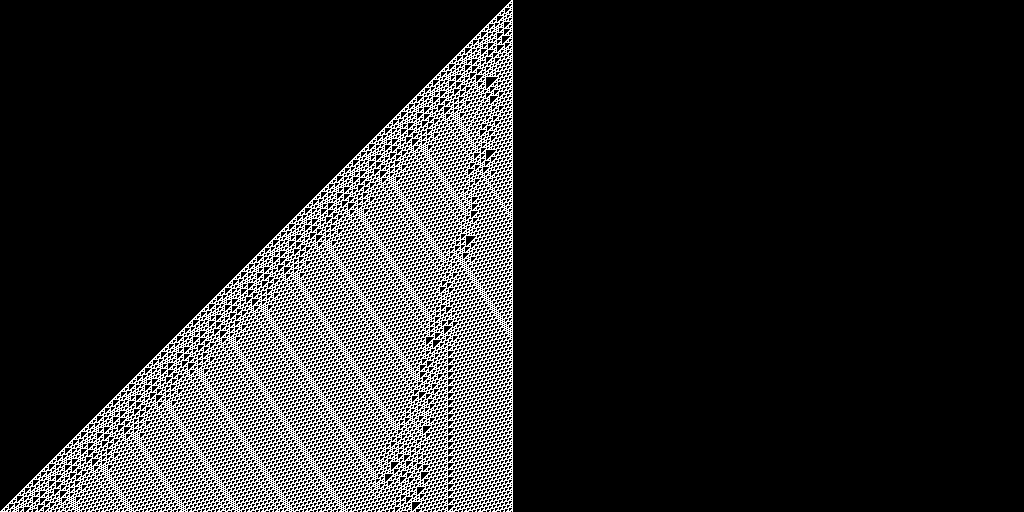

In [9]:
mediapy.show_image(state)